### Data Visualization using matplotlib
- Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City
- Dataset: "City_Air_Quality.csv"
- Description: The dataset contains information about air quality measurements in a specific
city over a period of time. It includes attributes such as date, time, pollutant levels (e.g.,
PM2.5, PM10, CO), and the Air Quality Index (AQI) values. 
- The goal is to use the matplotlib
library to create visualizations that effectively represent the AQI trends and patterns for
different pollutants in the city.
#### Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant
levels, and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or
time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different
pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and
pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color
schemes.

### Exam specific
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant
levels, and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.

In [2]:
import pandas as pd

In [5]:
air_quality_data  = pd.read_csv('City_Air_Quality.csv')
air_quality_data .head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
air_quality_data .shape

(29531, 16)

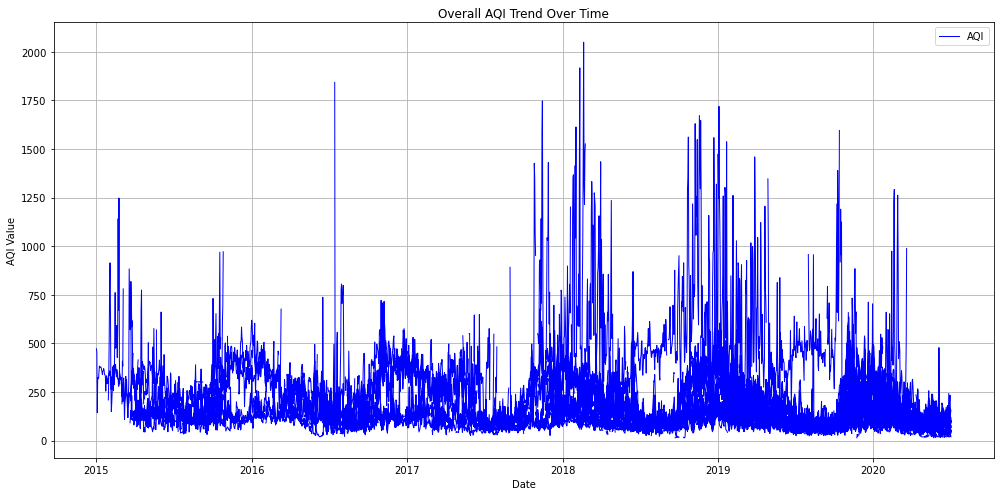

In [7]:
import matplotlib.pyplot as plt

# Convert 'Date' from string to datetime for proper plotting
air_quality_data['Date'] = pd.to_datetime(air_quality_data['Date'])

# Plotting overall AQI trend over time
plt.figure(figsize=(14, 7))
plt.plot(air_quality_data['Date'], air_quality_data['AQI'], label='AQI', color='blue', linewidth=1)
plt.title('Overall AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.legend()
plt.grid(True)
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()

# We will handle missing values by not displaying them in the plot. In case of a real-world scenario,
# we could consider imputing missing values depending on the context and necessity.


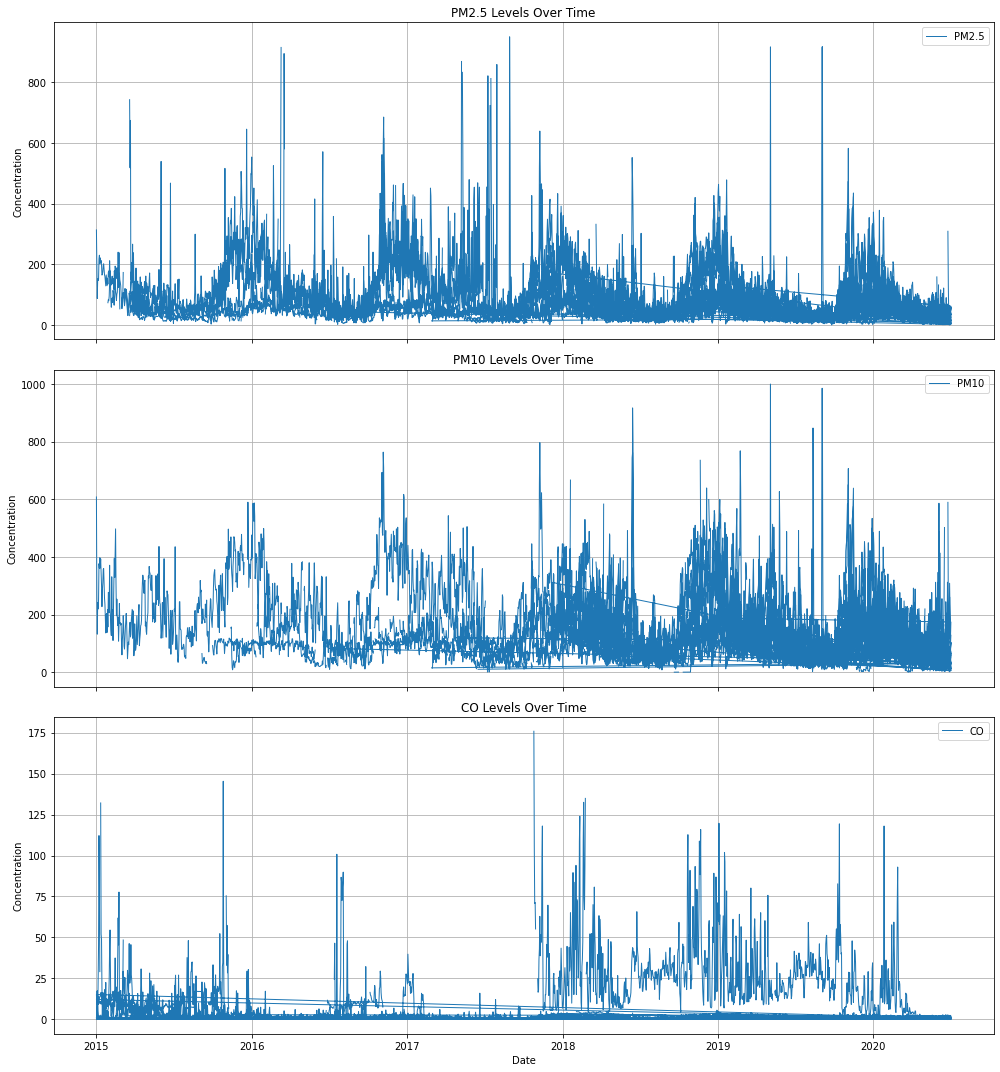

In [8]:
# Setting up the canvas for multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 15), sharex=True)

# List of pollutants for which we will create line plots
pollutants = ['PM2.5', 'PM10', 'CO']

# Plotting trends for each pollutant on a separate subplot
for i, pollutant in enumerate(pollutants):
    axes[i].plot(air_quality_data['Date'], air_quality_data[pollutant], label=pollutant, linewidth=1)
    axes[i].set_title(f'{pollutant} Levels Over Time')
    axes[i].set_ylabel('Concentration')
    axes[i].legend()
    axes[i].grid(True)

# Common X-axis label
plt.xlabel('Date')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


<Figure size 1008x504 with 0 Axes>

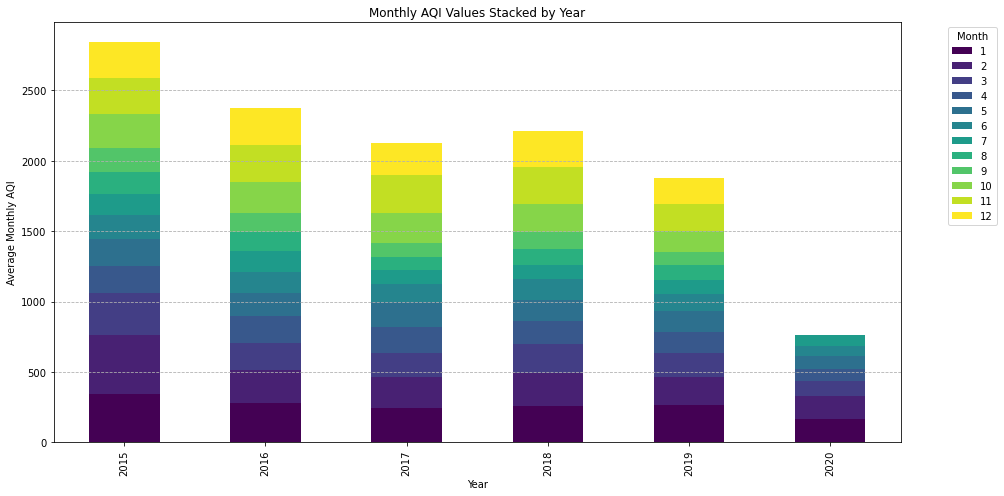

In [9]:
import numpy as np

# For the bar plots, let's group data by month and year for a clearer trend.
# We will use the average AQI of each month for the bar plot.

# Adding year and month columns for grouping
air_quality_data['Year'] = air_quality_data['Date'].dt.year
air_quality_data['Month'] = air_quality_data['Date'].dt.month

# Grouping by year and month and calculating mean AQI
monthly_aqi = air_quality_data.groupby(['Year', 'Month'])['AQI'].mean().reset_index()

# Pivoting the data to have months as columns and years as rows
monthly_aqi_pivot = monthly_aqi.pivot(index='Year', columns='Month', values='AQI')

# Plotting the bar plot
plt.figure(figsize=(14, 7))
monthly_aqi_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))

# Customizing the plot
plt.title('Monthly AQI Values Stacked by Year')
plt.xlabel('Year')
plt.ylabel('Average Monthly AQI')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


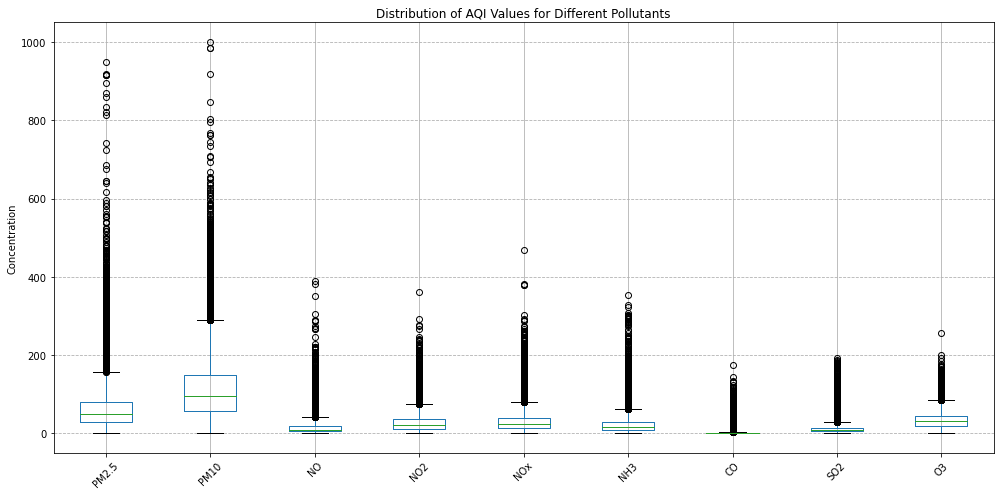

In [10]:
# Creating a list of pollutants for which we will create box plots
pollutants_for_boxplot = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Creating box plots for each pollutant
plt.figure(figsize=(14, 7))
air_quality_data.boxplot(column=pollutants_for_boxplot)

# Customizing the plot
plt.title('Distribution of AQI Values for Different Pollutants')
plt.ylabel('Concentration')
plt.xticks(rotation=45) # Rotating x-ticks for better readability
plt.grid(True, linestyle='--', which='major', axis='y')

# Show the plot
plt.tight_layout()
plt.show()


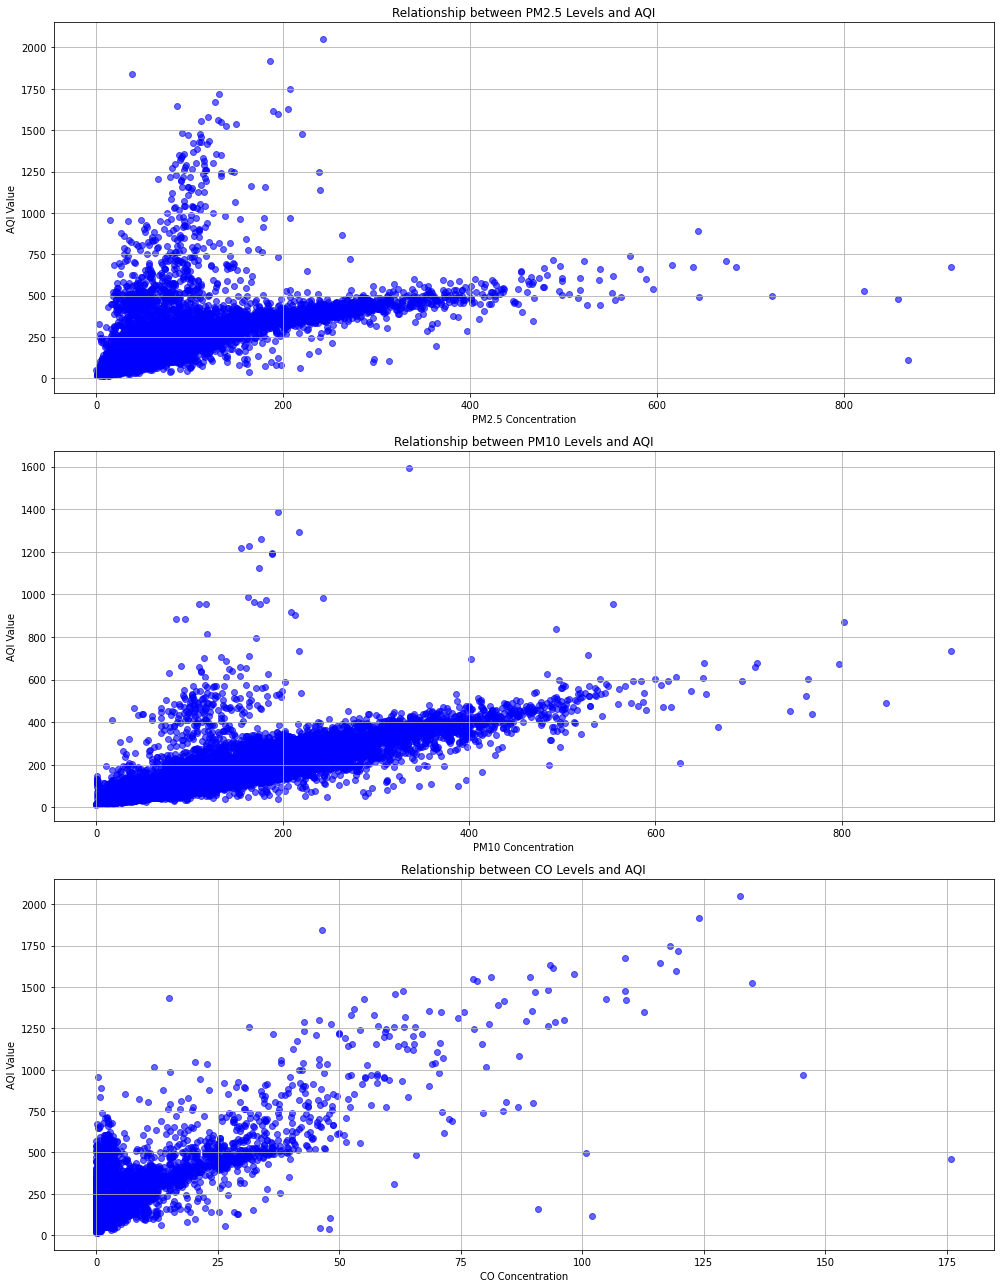

In [11]:
# Creating scatter plots for PM2.5, PM10, and CO against AQI to explore relationships

# We will create a 3x1 subplot canvas for three scatter plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=False)

# List of pollutants to be plotted against AQI
scatter_pollutants = ['PM2.5', 'PM10', 'CO']

# Plotting scatter plots
for i, pollutant in enumerate(scatter_pollutants):
    axes[i].scatter(air_quality_data[pollutant], air_quality_data['AQI'], alpha=0.6, c='blue')
    axes[i].set_title(f'Relationship between {pollutant} Levels and AQI')
    axes[i].set_xlabel(f'{pollutant} Concentration')
    axes[i].set_ylabel('AQI Value')
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
